<h1>Make Figures</h1>

In [2]:
import os
import sys
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.getcwd() + '/Tools/')
import AnalysisTools
reload(AnalysisTools)
dt = AnalysisTools.DataTools()

FitsFolder = os.getcwd()+'/Fits'
FiguresFolder = os.getcwd()+'/Figures'
FileList = dt.FileList(FitsFolder,['.hdf'])

##### Functions #####

def LoadData(FileList) :
    Data = list()
    for File in FileList :
        Store = pd.HDFStore(FitsFolder + '/' + File)
        TempData = {'File': File}
        for key in Store.keys() :
            TempData[str.replace(key,'/','')] = Store.get(key)
        Store.close()
        Data.append(TempData)
    
    return Data

##### Print files in folder #####

print('Files in folder:')
for Name in FileList :
    print(Name)

Files in folder:
SFG181009_01 - CH3OH_O2_Ni - 2600-3200 - BZ.hdf
SFG181009_01 - CH3OH_O2_Ni - 2600-3200.hdf
SFG181022_01 - CH3OH_Ni - 2600-3200.hdf
SFG181023_01 - CH3OH_Ni - 1600-2200.hdf
SFG200327_01 - CH3OH_Ni - 1600-2200.hdf
SFG200504_01 - CH3OH_O2_Ni - 1600-2200.hdf
TPD181019_03 - CH3OH_O2_Ni.hdf
TPD181022_01 - CH3OH_Ni.hdf


<h2>Methanol on Nickel</h2>

Files:
    SFG181022_01 - CH3OH_Ni - 2600-3200.hdf
    SFG200327_01 - CH3OH_Ni - 1600-2200.hdf
    TPD181022_01 - CH3OH_Ni.hdf


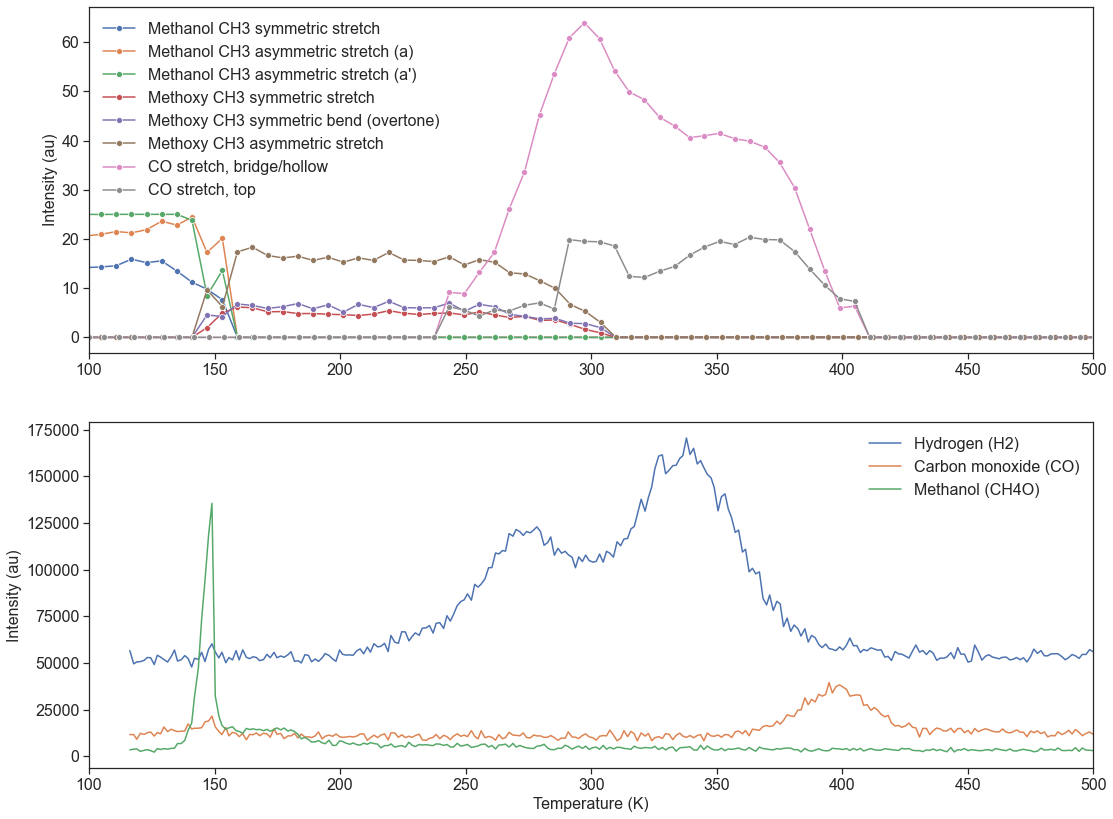

In [6]:
##### Load data #####

Files = list()
Files.append('SFG181022_01 - CH3OH_Ni - 2600-3200.hdf')
Files.append('SFG200327_01 - CH3OH_Ni - 1600-2200.hdf')
Files.append('TPD181022_01 - CH3OH_Ni.hdf')

Data = LoadData(Files)

print('Files:')
for file in Files :
    print('    '+file)

##### Plot data #####

# setup plot
sns.set_theme(style="ticks")
fig = plt.figure(figsize=(18, 14))

# Add SFG data
ax = fig.add_subplot(2, 1, 1)

Exclude = ['NonRes','Background','Water OH stretch']
for i, DataSet in enumerate(Data) :
    if 'SFG' in DataSet['File'] :
        for j, column in enumerate(DataSet['Fits_Parameters']) :
            if 'amp' in column :
                Feature = column.split('_')[0]
                Assignment = DataSet['Fits_Assignments']['Assignment'].loc[Feature]
                if Feature in Exclude or Assignment in Exclude :
                    pass
                else :
                    x = DataSet['Fits_Parameters'].index
                    y = DataSet['Fits_Parameters'][column].values.astype('float64')
                    sns.lineplot(x=x,y=y,label=DataSet['Fits_Assignments'].loc[str.replace(column,'_amp','')].values[0],marker='o')

# Customize plot
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.xlim(100,500)
plt.ylabel('Intensity (au)',fontsize=16)
plt.legend(frameon=False, fontsize=16)

# Add TDS data
ax = fig.add_subplot(2, 1, 2)

TDS2Plot = ['Mass 2','Mass 28','Mass 32']
for i, DataSet in enumerate(Data) :
    if 'TPD' in DataSet['File'] :
        for j, column in enumerate(DataSet['Data']) :
            if column in TDS2Plot :
                x = DataSet['Data'].index
                y = DataSet['Data'][column].values.astype('float64')
                sns.lineplot(x=x,y=y,label=DataSet['Assignments'].loc[int(str.replace(column,'Mass ',''))].values[0])

# Customize plot
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.xlim(100,500)
plt.xlabel('Temperature (K)',fontsize=16)
plt.ylabel('Intensity (au)',fontsize=16)
plt.legend(frameon=False, fontsize=16)

# Save figure
plt.savefig(FiguresFolder + '/Methanol on nickel.svg')

# Show plot
plt.show()

<h2>Methanol and Oxygen on Nickel</h2>

Files:
    SFG181009_01 - CH3OH_O2_Ni - 2600-3200.hdf
    SFG200504_01 - CH3OH_O2_Ni - 1600-2200.hdf
    TPD181019_03 - CH3OH_O2_Ni.hdf


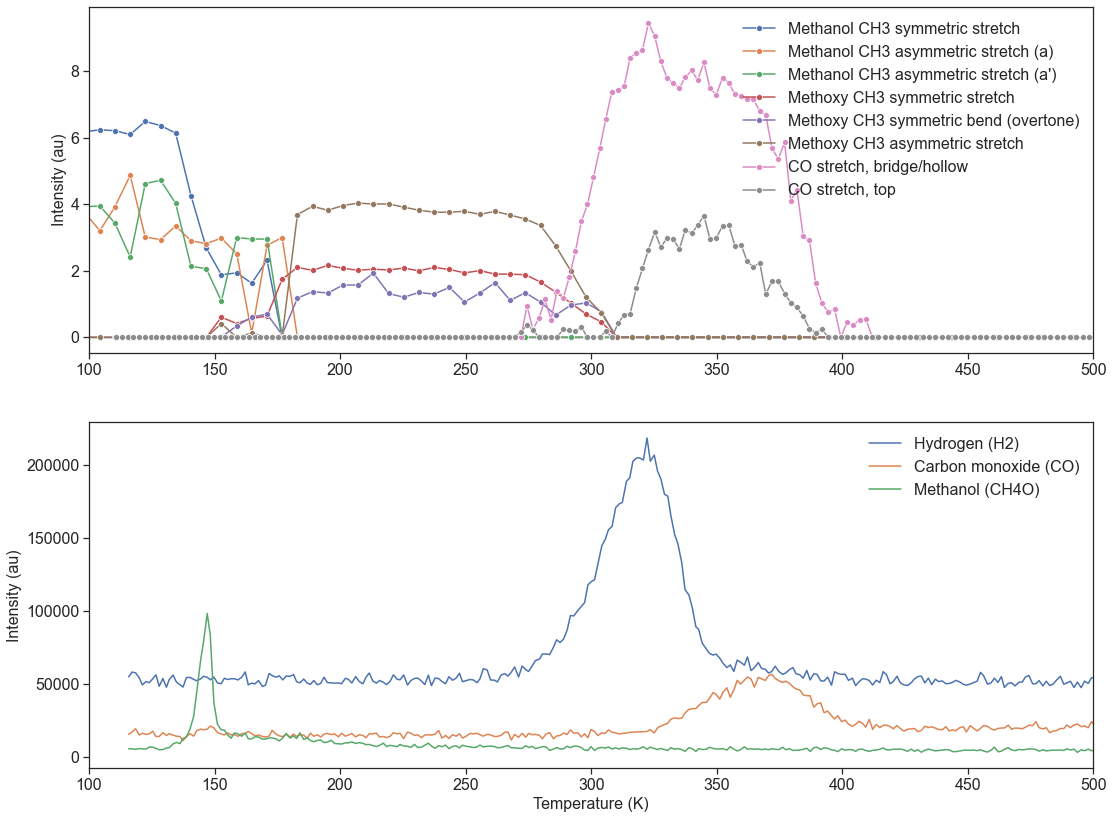

In [5]:
##### Load data #####

Files = list()
Files.append('SFG181009_01 - CH3OH_O2_Ni - 2600-3200.hdf')
Files.append('SFG200504_01 - CH3OH_O2_Ni - 1600-2200.hdf')
Files.append('TPD181019_03 - CH3OH_O2_Ni.hdf')

Data = LoadData(Files)

print('Files:')
for file in Files :
    print('    '+file)

##### Plot data #####

# setup plot
sns.set_theme(style="ticks")
fig = plt.figure(figsize=(18, 14))

# Add SFG data
ax = fig.add_subplot(2, 1, 1)

Exclude = ['NonRes','Background','Water OH stretch']
for i, DataSet in enumerate(Data) :
    if 'SFG' in DataSet['File'] :
        for j, column in enumerate(DataSet['Fits_Parameters']) :
            if 'amp' in column :
                Feature = column.split('_')[0]
                Assignment = DataSet['Fits_Assignments']['Assignment'].loc[Feature]
                if Feature in Exclude or Assignment in Exclude :
                    pass
                else :
                    x = DataSet['Fits_Parameters'].index
                    y = DataSet['Fits_Parameters'][column].values.astype('float64')
                    if i == 1 :
                        y=y/6
                    sns.lineplot(x=x,y=y,label=DataSet['Fits_Assignments'].loc[Feature].values[0],marker='o')

# Customize plot
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.xlim(100,500)
plt.ylabel('Intensity (au)',fontsize=16)
plt.legend(frameon=False, fontsize=16)

# Add TDS data
ax = fig.add_subplot(2, 1, 2)

TDS2Plot = ['Mass 2','Mass 28','Mass 32']
for i, DataSet in enumerate(Data) :
    if 'TPD' in DataSet['File'] :
        for j, column in enumerate(DataSet['Data']) :
            if column in TDS2Plot :
                x = DataSet['Data'].index
                y = DataSet['Data'][column].values.astype('float64')
                sns.lineplot(x=x,y=y,label=DataSet['Assignments'].loc[int(str.replace(column,'Mass ',''))].values[0])

# Customize plot
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.xlim(100,500)
plt.xlabel('Temperature (K)',fontsize=16)
plt.ylabel('Intensity (au)',fontsize=16)
plt.legend(frameon=False, fontsize=16)

# Save figure
plt.savefig(FiguresFolder + '/Methanol and oxygen on nickel.svg')

# Show plot
plt.show()